<a href="https://colab.research.google.com/github/peterzk/Group-6-Project/blob/master/GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GROUP 6 PYTHON PROJECT**

# **1.0 Importing our Libraries**

In [0]:
# Importing the pandas library
import pandas as pd
# Importing the numpy library
import numpy as np

# **1.1 Loading and previewing the Dataset from our CSV file**

In [0]:
# LOADING OUR DATASETS
# WE START WITH THE 2011_Traffic_Incidences_From_Desinventar
# URL  {2011 Traffic Incidences From Desinventar]
with open('2011_Traffic_Incidences_From_Desinventar.csv','r')as f:
   traffic = pd.read_csv(f,encoding='utf',index_col='OBJECTID')

traffic.head()

,Serial,Event,Code_County,County,Code_District,District,Code_Division,Division,Date_YMD,Comments,Cause,Description_of_Cause,Source,Magnitude,GLIDEnumber,Other_sectors,DataCards,Deaths,Injured,Missing,Houses_Destroyed,Houses_Damaged,Victims,Affected,Relocated,Evacuated,Losses_$USD,Losses_$Local,Education_centers,Hospitals,Damages_in_crops_Ha,Lost_Cattle
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Serial,Event,Code County,County,Code District,District,Code Division,Division,Date (YMD),Comments,Cause,Description of Cause,Source,Magnitude,GLIDEnumber,Other sectors,DataCards,Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.,Lost Cattle
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,NaN,Error,Pedestrian crossing road,KPR,NaN,NaN,car damaged,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,29,TRAFFIC ACCIDENT,30,NAIROBI,3001,NAIROBI,300106,MAKADARA,01/01/2011 08:00:00 AM +0000,NaN,NaN,Hit and run,KPR,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,TRAFFIC ACCIDENT,12,KERICHO,1203,BURET,120303,KONOIN,01/01/2011 08:00:00 AM +0000,NaN,Other cause,Driver lost control of the vehicle.,KPR,NaN,NaN,The motor vehicle front bumper and windscreen ...,1,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,TRAFFIC ACCIDENT,23,MAKUENI,2305,MAKUENI,230504,KASIKEU,01/30/2011 08:00:00 AM +0000,NaN,Negligence,Recklessness,NaN,NaN,NaN,Minivan and Leyland lorry damaged,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# We preview our columns
traffic.columns

Index(['Serial', 'Event', 'Code_County', 'County', 'Code_District', 'District',
       'Code_Division', 'Division', 'Date_YMD', 'Comments', 'Cause',
       'Description_of_Cause', 'Source', 'Magnitude', 'GLIDEnumber',
       'Other_sectors', 'DataCards', 'Deaths', 'Injured', 'Missing',
       'Houses_Destroyed', 'Houses_Damaged', 'Victims', 'Affected',
       'Relocated', 'Evacuated', 'Losses_$USD', 'Losses_$Local',
       'Education_centers', 'Hospitals', 'Damages_in_crops_Ha', 'Lost_Cattle'],
      dtype='object')

# **1.2 Accessing Information about our Dataset**

In [0]:
# Accessing Information about our Dataset

print(traffic.describe())
traffic.info()

       Serial             Event  ... Damages_in_crops_Ha Lost_Cattle
count    1355              1355  ...                1355        1355
unique   1354                 2  ...                   2           2
top       675  TRAFFIC ACCIDENT  ...                   0           0
freq        2              1354  ...                1354        1354

[4 rows x 32 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 0 to 1354
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Serial                1355 non-null   object
 1   Event                 1355 non-null   object
 2   Code_County           1355 non-null   object
 3   County                1355 non-null   object
 4   Code_District         1347 non-null   object
 5   District              1347 non-null   object
 6   Code_Division         1189 non-null   object
 7   Division              1189 non-null   object
 8   Date_YMD            

# **1.3 CLEANING OUR DATASET**

## **1.31 Checking for Validity and uniformity**

In [0]:
# We drop the first row since it is a duplication of column names

traffic.drop(0, axis=0, inplace= True)
traffic.head(2)

,Serial,Event,Code_County,County,Code_District,District,Code_Division,Division,Date_YMD,Comments,Cause,Description_of_Cause,Source,Magnitude,GLIDEnumber,Other_sectors,DataCards,Deaths,Injured,Missing,Houses_Destroyed,Houses_Damaged,Victims,Affected,Relocated,Evacuated,Losses_$USD,Losses_$Local,Education_centers,Hospitals,Damages_in_crops_Ha,Lost_Cattle
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,NaN,Error,Pedestrian crossing road,KPR,NaN,NaN,car damaged,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,29,TRAFFIC ACCIDENT,30,NAIROBI,3001,NAIROBI,300106,MAKADARA,01/01/2011 08:00:00 AM +0000,NaN,NaN,Hit and run,KPR,NaN,NaN,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# We remove whitespaces in our columns
# We also ensure that our columns are of the same case

traffic.columns= traffic.columns.str.replace(" "," ").str.upper()
traffic.columns

Index(['SERIAL', 'EVENT', 'CODE_COUNTY', 'COUNTY', 'CODE_DISTRICT', 'DISTRICT',
       'CODE_DIVISION', 'DIVISION', 'DATE_YMD', 'COMMENTS', 'CAUSE',
       'DESCRIPTION_OF_CAUSE', 'SOURCE', 'MAGNITUDE', 'GLIDENUMBER',
       'OTHER_SECTORS', 'DATACARDS', 'DEATHS', 'INJURED', 'MISSING',
       'HOUSES_DESTROYED', 'HOUSES_DAMAGED', 'VICTIMS', 'AFFECTED',
       'RELOCATED', 'EVACUATED', 'LOSSES_$USD', 'LOSSES_$LOCAL',
       'EDUCATION_CENTERS', 'HOSPITALS', 'DAMAGES_IN_CROPS_HA', 'LOST_CATTLE'],
      dtype='object')

In [0]:
# We drop columns that w do not need for our analysis
# EXPLANATION: We will drop 'MISSING','HOUSES_DESTROYED', 'HOUSES_DAMAGED', 'VICTIMS', 'AFFECTED','RELOCATED', 'EVACUATED', 'LOSSES_$USD', 'LOSSES_$LOCAL','EDUCATION_CENTERS', 'HOSPITALS', 'DAMAGES_IN_CROPS_HA', 'LOST_CATTLE','COMMENTS','SOURCE','MAGNITUDE', 'GLIDENUMBER','OTHER_SECTORS' Columns

traffic = traffic.drop( ['MISSING','HOUSES_DESTROYED', 'HOUSES_DAMAGED', 'VICTIMS', 'AFFECTED','RELOCATED', 'EVACUATED', 'LOSSES_$USD', 'LOSSES_$LOCAL','EDUCATION_CENTERS', 'HOSPITALS', 'DAMAGES_IN_CROPS_HA', 'LOST_CATTLE','COMMENTS','SOURCE','MAGNITUDE', 'GLIDENUMBER','OTHER_SECTORS'],axis=1)
traffic.head(1)

,SERIAL,EVENT,CODE_COUNTY,COUNTY,CODE_DISTRICT,DISTRICT,CODE_DIVISION,DIVISION,DATE_YMD,CAUSE,DESCRIPTION_OF_CAUSE,DATACARDS,DEATHS,INJURED
OBJECTID,,,,,,,,,,,,,,
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,Error,Pedestrian crossing road,1,1,0


In [0]:
# We preview our columns for the new table
traffic.columns

Index(['SERIAL', 'EVENT', 'CODE_COUNTY', 'COUNTY', 'CODE_DISTRICT', 'DISTRICT',
       'CODE_DIVISION', 'DIVISION', 'DATE_YMD', 'CAUSE',
       'DESCRIPTION_OF_CAUSE', 'DATACARDS', 'DEATHS', 'INJURED'],
      dtype='object')

In [0]:
# We remove whtespaces from our rows
# We also ensure that our rows are of the same case

traffic['EVENT']=traffic['EVENT'].str.replace(" "," ").str.upper()
traffic['COUNTY']= traffic['COUNTY'].str.replace(" "," ").str.upper()
traffic['DISTRICT']=traffic['DISTRICT'].str.replace(" "," ").str.upper()
traffic['DIVISION']=traffic['DIVISION'].str.replace(" "," ").str.upper()
traffic['CAUSE']=traffic['CAUSE'].str.replace(" "," ").str.upper()
traffic['DESCRIPTION_OF_CAUSE']=traffic['DESCRIPTION_OF_CAUSE'].str.replace(" "," ").str.upper()
traffic['DATACARDS']=traffic['DATACARDS'].str.replace(" "," ").str.upper()
traffic['DEATHS']=traffic['DEATHS'].str.replace(" "," ").str.upper()
traffic['INJURED']=traffic['INJURED'].str.replace(" "," ").str.upper()
traffic.head(5)

,SERIAL,EVENT,CODE_COUNTY,COUNTY,CODE_DISTRICT,DISTRICT,CODE_DIVISION,DIVISION,DATE_YMD,CAUSE,DESCRIPTION_OF_CAUSE,DATACARDS,DEATHS,INJURED
OBJECTID,,,,,,,,,,,,,,
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,ERROR,PEDESTRIAN CROSSING ROAD,1,1,0
2,29,TRAFFIC ACCIDENT,30,NAIROBI,3001,NAIROBI,300106,MAKADARA,01/01/2011 08:00:00 AM +0000,NaN,HIT AND RUN,1,1,0
3,35,TRAFFIC ACCIDENT,12,KERICHO,1203,BURET,120303,KONOIN,01/01/2011 08:00:00 AM +0000,OTHER CAUSE,DRIVER LOST CONTROL OF THE VEHICLE.,1,0,14
4,20,TRAFFIC ACCIDENT,23,MAKUENI,2305,MAKUENI,230504,KASIKEU,01/30/2011 08:00:00 AM +0000,NEGLIGENCE,RECKLESSNESS,1,0,1
5,36,TRAFFIC ACCIDENT,20,LAIKIPIA,2008,LAIKIPIA WEST,200801,CENTRAL LAIKIPIA,01/01/2011 08:00:00 AM +0000,ERROR,PEDAL CYCLIST WAS KNOCKED DOWN.,1,1,0


## **1.32 Accuracy**

In [0]:
#  We convert our DEATH and INJURED columns datatypes from string to integer

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(traffic['DEATHS'])
traffic['DEATHS'] = encoder.transform(traffic['DEATHS'])

encoder.fit(traffic['INJURED'])
traffic['INJURED']=encoder.transform(traffic['INJURED'])

traffic.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 1 to 1354
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SERIAL                1354 non-null   object
 1   EVENT                 1354 non-null   object
 2   CODE_COUNTY           1354 non-null   object
 3   COUNTY                1354 non-null   object
 4   CODE_DISTRICT         1346 non-null   object
 5   DISTRICT              1346 non-null   object
 6   CODE_DIVISION         1188 non-null   object
 7   DIVISION              1188 non-null   object
 8   DATE_YMD              1354 non-null   object
 9   CAUSE                 1333 non-null   object
 10  DESCRIPTION_OF_CAUSE  1249 non-null   object
 11  DATACARDS             1354 non-null   object
 12  DEATHS                1354 non-null   int64 
 13  INJURED               1354 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 158.7+ KB


In [0]:
# We describe our dataset
traffic.describe()

,DEATHS,INJURED
count,1354.000000,1354.000000
mean,1.270310,3.157312
std,1.470344,7.004565
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,12.000000,31.000000


## **1.33 Completeness**

In [0]:
# We fill empty cells in the CAUSE column randomly with cells that are above 
# We fill empty cells on the DESCRIPTION_OF_CAUSE column with those on a corresponding index in the CAUSE column since the fields are related 
# We fill empty cells on the 'CODE_DISTRICT' column with those on a corresponding index in the 'CODE_COUNTY' column since the fields are related 
# We fill empty cells on the 'DISTRICT' column with those on a corresponding index in the 'COUNTY' column since the fields are related 
# We fill empty cells on the 'CODE_DIVISION' column with those on a corresponding index in the 'CODE_DISTRICT' column since the fields are related 
# We fill empty cells on the 'DIVISION' column with those on a corresponding index in the 'DISTRICT' column since the fields are related 

traffic['CAUSE'].fillna(method='ffill', inplace =True)
traffic['DESCRIPTION_OF_CAUSE'].fillna(traffic['CAUSE'], inplace = True)
traffic['DISTRICT'].fillna(traffic['COUNTY'], inplace=True)
traffic['CODE_DISTRICT'].fillna(traffic['CODE_COUNTY'],inplace = True)
traffic['CODE_DIVISION'].fillna(traffic['CODE_DISTRICT'], inplace = True)
traffic['DIVISION'].fillna(traffic['DISTRICT'],inplace = True) 
traffic.info()

## **1.34Consistency**

In [0]:
# We check for duplicates in our data
# We drop duplicates if any
print(traffic.duplicated().sum())
traffic = traffic.drop_duplicates()
traffic.head()

0


,SERIAL,EVENT,CODE_COUNTY,COUNTY,CODE_DISTRICT,DISTRICT,CODE_DIVISION,DIVISION,DATE_YMD,CAUSE,DESCRIPTION_OF_CAUSE,DATACARDS,DEATHS,INJURED
OBJECTID,,,,,,,,,,,,,,
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,ERROR,PEDESTRIAN CROSSING ROAD,1,1,0
2,29,TRAFFIC ACCIDENT,30,NAIROBI,3001,NAIROBI,300106,MAKADARA,01/01/2011 08:00:00 AM +0000,NaN,HIT AND RUN,1,1,0
3,35,TRAFFIC ACCIDENT,12,KERICHO,1203,BURET,120303,KONOIN,01/01/2011 08:00:00 AM +0000,OTHER CAUSE,DRIVER LOST CONTROL OF THE VEHICLE.,1,0,6
4,20,TRAFFIC ACCIDENT,23,MAKUENI,2305,MAKUENI,230504,KASIKEU,01/30/2011 08:00:00 AM +0000,NEGLIGENCE,RECKLESSNESS,1,0,1
5,36,TRAFFIC ACCIDENT,20,LAIKIPIA,2008,LAIKIPIA WEST,200801,CENTRAL LAIKIPIA,01/01/2011 08:00:00 AM +0000,ERROR,PEDAL CYCLIST WAS KNOCKED DOWN.,1,1,0


## **Check the for outliers**

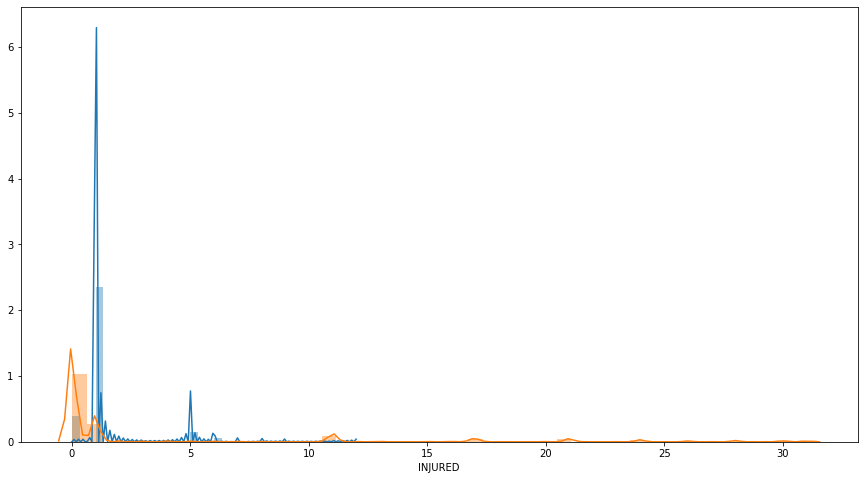

In [0]:
#We check for the distribution of our data

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.distplot(traffic.DEATHS)
sns.distplot(traffic.INJURED)

In [0]:
trafic.to_csv('trafic_accidents.csv')

# **ANALYSIS**

In [0]:
# Which county experienced the most accidents? 
county_max = traffic.groupby(['COUNTY'])['EVENT'].count().sort_values(ascending= False).head(5)
county_max

COUNTY
NAIROBI     286
KIAMBU      141
NAKURU      124
KAKAMEGA     54
MERU         49
Name: EVENT, dtype: int64

In [0]:
# Which county experienced the most accidents? 

county_min = traffic.groupby(['COUNTY'])['EVENT'].count().sort_values(ascending = True)
county_min.head(5)

COUNTY
SAMBURU    1
MANDERA    1
LAMU       1
TURKANA    2
WAJIR      3
Name: EVENT, dtype: int64

In [0]:
# Which District experienced the most accidents?

district_max = traffic.groupby(['DISTRICT'])['EVENT'].count().sort_values(ascending=False).head(5)
district_max


DISTRICT
NAIROBI     286
NAKURU      123
KIAMBU       76
THIKA        65
MACHAKOS     47
Name: EVENT, dtype: int64

In [0]:
# Which District experienced the least accidents?
district_min = traffic.groupby(['DISTRICT'])['EVENT'].count().sort_values(ascending=True).head(5)
district_min

DISTRICT
LAMU             1
SAMBURU NORTH    1
MANDERA          1
MARSABIT         1
TURKANA          2
Name: EVENT, dtype: int64

In [0]:
# Which Division experienced the least accidents?
division_max = traffic.groupby(['DIVISION'])['EVENT'].count().sort_values(ascending=True).head(5)
division_max

DIVISION
ABOGETA              1
MODOGASHE            1
MIWANI               1
MIRIGA MIERU WEST    1
MIGWANI              1
Name: EVENT, dtype: int64

In [0]:
# We split the 'DATE_YMD' to 'MONTH','DAY','YEAR' and 'HOUR'.

import datetime

traffic['MONTH'] = pd.DatetimeIndex(traffic['DATE_YMD']).month
traffic['DAY']= pd.DatetimeIndex(traffic['DATE_YMD']).day
traffic['YEAR']= pd.DatetimeIndex(traffic['DATE_YMD']).year
traffic['HOUR'] = pd.DatetimeIndex(traffic['DATE_YMD']).hour
traffic.head()

,SERIAL,EVENT,CODE_COUNTY,COUNTY,CODE_DISTRICT,DISTRICT,CODE_DIVISION,DIVISION,DATE_YMD,CAUSE,DESCRIPTION_OF_CAUSE,DATACARDS,DEATHS,INJURED,MONTH,DAY,YEAR,HOUR
OBJECTID,,,,,,,,,,,,,,,,,,
1,11,TRAFFIC ACCIDENT,13,KIAMBU,1301,KIAMBU,130104,LARI,11/09/2011 08:00:00 AM +0000,ERROR,PEDESTRIAN CROSSING ROAD,1,1,0,11,9,2011,8
2,29,TRAFFIC ACCIDENT,30,NAIROBI,3001,NAIROBI,300106,MAKADARA,01/01/2011 08:00:00 AM +0000,NaN,HIT AND RUN,1,1,0,1,1,2011,8
3,35,TRAFFIC ACCIDENT,12,KERICHO,1203,BURET,120303,KONOIN,01/01/2011 08:00:00 AM +0000,OTHER CAUSE,DRIVER LOST CONTROL OF THE VEHICLE.,1,0,6,1,1,2011,8
4,20,TRAFFIC ACCIDENT,23,MAKUENI,2305,MAKUENI,230504,KASIKEU,01/30/2011 08:00:00 AM +0000,NEGLIGENCE,RECKLESSNESS,1,0,1,1,30,2011,8
5,36,TRAFFIC ACCIDENT,20,LAIKIPIA,2008,LAIKIPIA WEST,200801,CENTRAL LAIKIPIA,01/01/2011 08:00:00 AM +0000,ERROR,PEDAL CYCLIST WAS KNOCKED DOWN.,1,1,0,1,1,2011,8


In [0]:
 # Which MONTH had the most accidents?

month_max = traffic.groupby(['MONTH'])['EVENT'].count().sort_values(ascending = False)
month_max.head()

MONTH
9     202
1     191
10    173
6     159
7     139
Name: EVENT, dtype: int64

In [0]:
 # Which MONTH had the least accidents?

month_min = traffic.groupby(['MONTH'])['EVENT'].count().sort_values(ascending = True)
month_min.head()


MONTH
8       6
12     23
5      28
11     36
3     127
Name: EVENT, dtype: int64

In [0]:
# Which day of the month recods the most Accidents

day_max = traffic.groupby(['DAY'])['EVENT'].count().sort_values(ascending = False)
day_max.head()

DAY
21    67
18    60
9     56
17    54
22    54
Name: EVENT, dtype: int64

In [0]:
# Which day of the month recoded the least Accidents

day_min = traffic.groupby(['DAY'])['EVENT'].count().sort_values(ascending = True)
day_min.head()

DAY
31    10
30    19
26    27
16    33
7     34
Name: EVENT, dtype: int64

In [0]:
# what is the cause of most accidents

cause = traffic.groupby(['CAUSE'])['EVENT'].count().sort_values(ascending = False)
cause

CAUSE
ERROR          924
NEGLIGENCE     254
HIT AND RUN    118
FAULT           23
OTHER CAUSE      7
UNKNOWN          5
RAIN             1
DROWNING         1
Name: EVENT, dtype: int64

In [0]:
# what Error causes most accidents

Error_max = traffic[traffic['CAUSE']== 'ERROR']

Error_max.groupby(['DESCRIPTION_OF_CAUSE'])['EVENT'].count().sort_values(ascending = False).head()

DESCRIPTION_OF_CAUSE
PEDESTRIAN CROSSING ROAD                89
PEDESTRIAN WALKING ALONG THE ROAD       29
PEDESTRIAN WAS KNOCKED DOWN BY A CAR    27
PEDESTRIAN WAS KNOCKED DOWN.            15
LOST CONTROL                            14
Name: EVENT, dtype: int64

In [0]:
# What Negligence causes most accidents

Error_min = traffic[traffic['CAUSE']=='NEGLIGENCE']
Error_min.groupby(['DESCRIPTION_OF_CAUSE'])['EVENT'].count().sort_values(ascending = False).head()

DESCRIPTION_OF_CAUSE
PEDESTRIAN KNOCKED DOWN                  90
PEDAL CYCLIST KNOCKED DOWN               17
LOST CONTROL                             16
JUVENILE PEDESTRIAN KNOCKED DOWN          4
PEDESTRIAN JUMPED ON A MOVING VEHICLE     3
Name: EVENT, dtype: int64

In [0]:
# What Fault cause most accidents

Fault = traffic[traffic['CAUSE']=='FAULT']
Fault.groupby(['DESCRIPTION_OF_CAUSE'])['EVENT'].count().sort_values(ascending = False).head()

DESCRIPTION_OF_CAUSE
TYRE BURST AND VEHICLE ROLLED SEVERAL TIMES              2
TYRE BURST                                               2
BRAKES FAILED, DRIVER LOST CONTROL AND HIT PEDESTRIAN    2
VEHICLE DEVELOPED MECHANICAL PROBLEMS                    1
M/CYCLE ACCIDENT                                         1
Name: EVENT, dtype: int64